# Amazon's Best Sellers 2025 - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data

In [2]:
best_sellers = pd.read_csv("data/Amazon_bestsellers_items_2025.csv")
best_sellers

,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
0,0,1,B073VKKNN9,Kaspersky | Premium - Total Security (Ultimate...,₹469.00,4.3,13324.0,https://www.amazon.in/dp/B073VKKNN9,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
1,1,2,B07PQZJ6Y8,"K7 Security K7, Total Security, 1 User, 1 Year...",₹370.00,4.4,2291.0,https://www.amazon.in/dp/B07PQZJ6Y8,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
2,2,3,B0D1KL34JM,Microsoft Office 2021 Professional - Lifetime ...,"₹1,799.00",4.5,388.0,https://www.amazon.in/dp/B0D1KL34JM,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
3,3,4,B07B9YYLGG,"Bitdefender - 1 Device,1 Year - Mobile Securit...",₹94.00,4.1,9630.0,https://www.amazon.in/dp/B07B9YYLGG,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
4,4,5,B073VLGMZ4,"McAfee Total Protection 2025 | 1 Device, 3 Yea...","₹1,699.00",4.4,5783.0,https://www.amazon.in/dp/B073VLGMZ4,https://images-eu.ssl-images-amazon.com/images...,NaN,IN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,96,B0DP7LBGM1,Microsoft Windows Server 2025 Standard Edition...,"$1,561.01",NaN,NaN,https://www.amazon.com.mx/dp/B0DP7LBGM1,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
995,995,97,B0CFZNMZW6,Photoshop Elements 2024 and Premiere Elements ...,"$3,067.45",4.0,82.0,https://www.amazon.com.mx/dp/B0CFZNMZW6,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
996,996,98,B09H2BRVWZ,Microsoft Office Hogar y Empresa 2021,"$5,999.00",4.9,12.0,https://www.amazon.com.mx/dp/B09H2BRVWZ,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2
997,997,99,B0C55NKHKL,"Virtual DJ and Karaoke Studio 8, Lifetime, 1 D...",NaN,3.7,3.0,https://www.amazon.com.mx/dp/B0C55NKHKL,https://images-na.ssl-images-amazon.com/images...,NaN,MX,2


#### Basic understanding of data

In [3]:
# basic info
best_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           999 non-null    int64  
 1   rank                 999 non-null    int64  
 2   asin                 999 non-null    object 
 3   product_title        999 non-null    object 
 4   product_price        945 non-null    object 
 5   product_star_rating  969 non-null    float64
 6   product_num_ratings  969 non-null    float64
 7   product_url          999 non-null    object 
 8   product_photo        999 non-null    object 
 9   rank_change_label    0 non-null      float64
 10  country              999 non-null    object 
 11  page                 999 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 93.8+ KB


In [12]:
# missing values
best_sellers.isnull().sum()

Unnamed: 0               0
rank                     0
asin                     0
product_title            0
product_price           54
product_star_rating     30
product_num_ratings     30
product_url              0
product_photo            0
rank_change_label      999
country                  0
page                     0
dtype: int64

In [14]:
# basic stat
best_sellers.describe()

,Unnamed: 0,rank,product_star_rating,product_num_ratings,rank_change_label,page
count,999.000000,999.000000,969.000000,969.000000,0.0,999.000000
mean,499.000000,50.450450,4.140248,1312.546956,NaN,1.499499
std,288.530761,28.852421,0.496382,3025.241537,NaN,0.500250
min,0.000000,1.000000,1.000000,1.000000,NaN,1.000000
25%,249.500000,25.500000,3.900000,54.000000,NaN,1.000000
50%,499.000000,50.000000,4.200000,218.000000,NaN,1.000000
75%,748.500000,75.000000,4.400000,1009.000000,NaN,2.000000
max,998.000000,100.000000,5.000000,19189.000000,NaN,2.000000


In [17]:
# shape
best_sellers.shape

(999, 12)

#### Data cleaning 

In [ ]:
# Clean product_price
best_sellers['product_price'] = df['product_price'].astype(str)

# Remove currency symbols and spaces
best_sellers['product_price'] = df['product_price'].replace(r'[₹$,€]', '', regex=True)

# Replace commas and weird spaces (like non-breaking)
df['product_price'] = df['product_price'].str.replace(',', '').str.strip()

# Convert to numeric
df['product_price'] = pd.to_numeric(df['product_price'], errors='coerce')

# Drop rows where price couldn't be converted
df = df.dropna(subset=['product_price'])

# checking for missing values
best_sellers.isnull().sum()

Unnamed: 0             0
rank                   0
asin                   0
product_title          0
product_price          0
product_star_rating    0
product_num_ratings    0
product_url            0
product_photo          0
rank_change_label      0
country                0
page                   0
dtype: int64

In [7]:
# top 5 expensive peoducts
best_sellers.sort_values(by='product_price', ascending=False).head()


,Unnamed: 0,rank,asin,product_title,product_price,product_star_rating,product_num_ratings,product_url,product_photo,rank_change_label,country,page
846,846,48,B01HB4P7G4,[Steam] Onechanbara Z2: Chaos(お姉チャンバラ Z2 ~カオス~...,￥91,NaN,NaN,https://www.amazon.co.jp/dp/B01HB4P7G4,https://images-fe.ssl-images-amazon.com/images...,NaN,JP,1
880,880,82,B01I31805O,[Steam] Onechanbara Z2: Chaos(お姉チャンバラ Z2 ~カオス~...,￥91,NaN,NaN,https://www.amazon.co.jp/dp/B01I31805O,https://images-fe.ssl-images-amazon.com/images...,NaN,JP,2
893,893,95,B0DK4QVLLX,ソースネクスト | いきなりPDF Ver.12 COMPLETE (最新版) | PDF...,"￥9,900",3.1,83.0,https://www.amazon.co.jp/dp/B0DK4QVLLX,https://images-fe.ssl-images-amazon.com/images...,NaN,JP,2
898,898,100,B07T1GBJV7,【最新版】Wondershare Filmora14 動画編集ソフト（Windows版） 使...,"￥9,480",3.8,758.0,https://www.amazon.co.jp/dp/B07T1GBJV7,https://images-fe.ssl-images-amazon.com/images...,NaN,JP,2
897,897,99,B0CN2Q3RZK,ESET HOME セキュリティ プレミアム(最新)| 1台3年 |オンラインコード版|ウイ...,"￥9,400",4.2,42.0,https://www.amazon.co.jp/dp/B0CN2Q3RZK,https://images-fe.ssl-images-amazon.com/images...,NaN,JP,2


In [27]:
# average rating by country
best_sellers.groupby('country')['product_star_rating'].mean()

country
AU    4.221348
CA    4.050000
DE    4.306000
ES    3.964000
FR    4.056250
IN    4.313000
IT    4.220202
JP    3.995699
MX    4.157895
US    4.113131
Name: product_star_rating, dtype: float64

### Data Visulization

#### Histogram

/Users/mohit/Documents/amazon_best_sellers_2025/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65509 (\N{FULLWIDTH YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


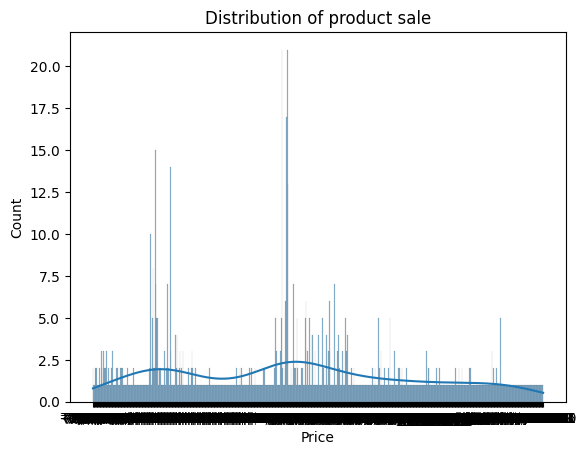

In [23]:
sns.histplot( best_sellers['product_price'].dropna(),bins=30, kde=True)
plt.title('Distribution of product sale')
plt.xlabel('Price')
plt.show()

#### Boxplot of ratings by country

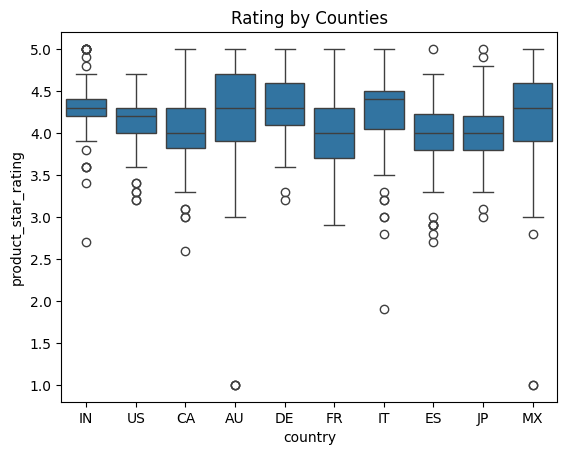

In [30]:
sns.boxplot(x='country', y='product_star_rating',data=best_sellers)
plt.title('Rating by Counties')
plt.show()

#### Scatter Plot

/Users/mohit/Documents/amazon_best_sellers_2025/venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65509 (\N{FULLWIDTH YEN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


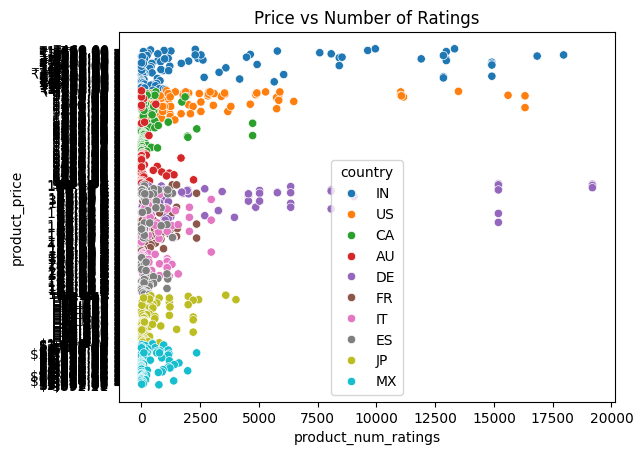

In [32]:
sns.scatterplot(x='product_num_ratings', y='product_price', hue='country', data=best_sellers)
plt.title("Price vs Number of Ratings")
plt.show()